In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


In [14]:
file_path = r"../data/processed/sentiment_scoring.csv"
df = pd.read_csv(file_path)
df.head()

,username,content,likecount,date,amend_weight_sum,length
0,SupremeWow,小米su7强势破圈太火爆了，雷总得抓紧提高产能啊,3025,2024/3/30 12:22,2.0,24
1,及米侠,感觉这次黑稿不太多，看来车圈还是更干净一些！,1725,2024/3/30 12:23,1.0,22
2,小麦Elite,小米手机1代回忆～,1020,2024/3/30 12:22,NaN,9
3,米12U,雷总辛苦了 感谢您为大家做了一辆Dream car,660,2024/3/30 12:22,1.0,25
4,Spider_boy666,雷总加电,650,2024/3/30 12:23,NaN,4


In [15]:
# 删除 '内容' 列中包含空值的所有行
df = df.dropna()

# 删除重复
df = df.drop_duplicates()
df.head()

,username,content,likecount,date,amend_weight_sum,length
0,SupremeWow,小米su7强势破圈太火爆了，雷总得抓紧提高产能啊,3025,2024/3/30 12:22,2.0,24
1,及米侠,感觉这次黑稿不太多，看来车圈还是更干净一些！,1725,2024/3/30 12:23,1.0,22
3,米12U,雷总辛苦了 感谢您为大家做了一辆Dream car,660,2024/3/30 12:22,1.0,25
5,柴柴chaial啊,我今天看了一早上雷总的发布会，尤其在汽车发布会最后那个鞠躬，让人泪目,469,2024/3/30 12:25,1.0,34
7,钟雨飞,年轻人特别喜欢SU7，定位太成功了！！！,297,2024/3/30 12:24,2.0,20


In [16]:
# # 将日期列转换为日期时间类型
# df['日期'] = pd.to_datetime(df['日期'])

# # 计算与参考日期（2024/3/30 12:22）的分钟差
# reference_date = pd.Timestamp('2024-03-30 12:22')
# df['分钟差'] = (df['日期'] - reference_date) / pd.Timedelta(minutes=1)  # 将时间差转换为分钟

# df.head()

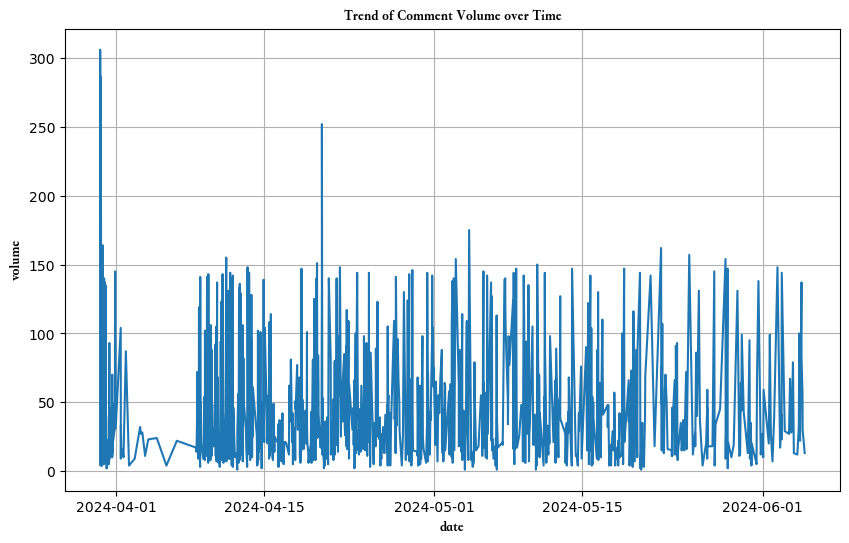

In [21]:
# 设置字体属性
font_path = "/System/Library/Fonts/Supplemental/Songti.ttc" 
font_prop = FontProperties(fname=font_path)


# 将日期列转换为日期时间类型
df['date'] = pd.to_datetime(df['date'])

# 按日期排序
df.sort_values(by='date', inplace=True)

# 选择日期和评论数列
date_comments = df[['date', 'length']]

# 按日期对评论数进行汇总
date_comments = date_comments.groupby('date').sum()

plt.figure(figsize=(10, 6))
plt.plot(date_comments.index, date_comments['length'], linestyle='-')
plt.title('Trend of Comment Volume over Time', fontproperties=font_prop)
plt.xlabel('date', fontproperties=font_prop)
plt.ylabel('volume', fontproperties=font_prop)
plt.grid(True)

output_path = r'../outputs/figures/quality/comment_count_change.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

/var/folders/ln/vtlcjcd5303gxd313xg81ygw0000gn/T/ipykernel_86519/4003352338.py:19: UserWarning: Glyph 8211 (\N{EN DASH}) missing from font(s) Songti SC.
  plt.savefig(output_path, dpi=300, bbox_inches='tight')
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8211 (\N{EN DASH}) missing from font(s) Songti SC.
  fig.canvas.print_figure(bytes_io, **kw)


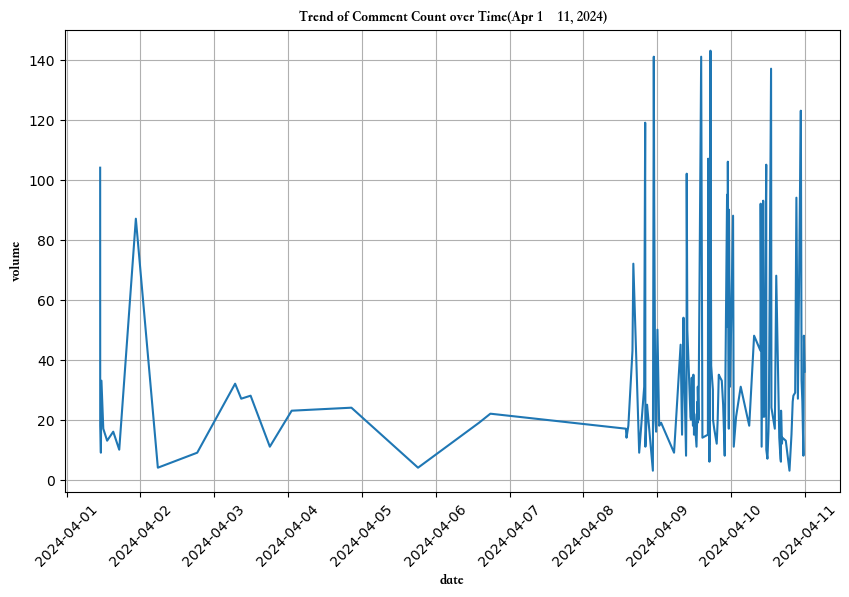

In [25]:
# 设置字体属性
font_path = "/System/Library/Fonts/Supplemental/Songti.ttc"
font_prop = FontProperties(fname=font_path)


# 筛选出4月1号到4月15号的数据
date_comments_april = date_comments[(date_comments.index >= '2024-04-01') & (date_comments.index <= '2024-04-11')]

# 绘制趋势图
plt.figure(figsize=(10, 6))
plt.plot(date_comments_april.index, date_comments_april['length'], linestyle='-')
plt.title('Trend of Comment Count over Time(Apr 1–11, 2024)', fontproperties=font_prop)
plt.xlabel('date', fontproperties=font_prop)
plt.ylabel('volume', fontproperties=font_prop)
plt.grid(True)
plt.xticks(ticks=plt.xticks()[0][::1], rotation=45)

output_path = r'../outputs/figures/quality/comment_trend_april.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')


plt.show()

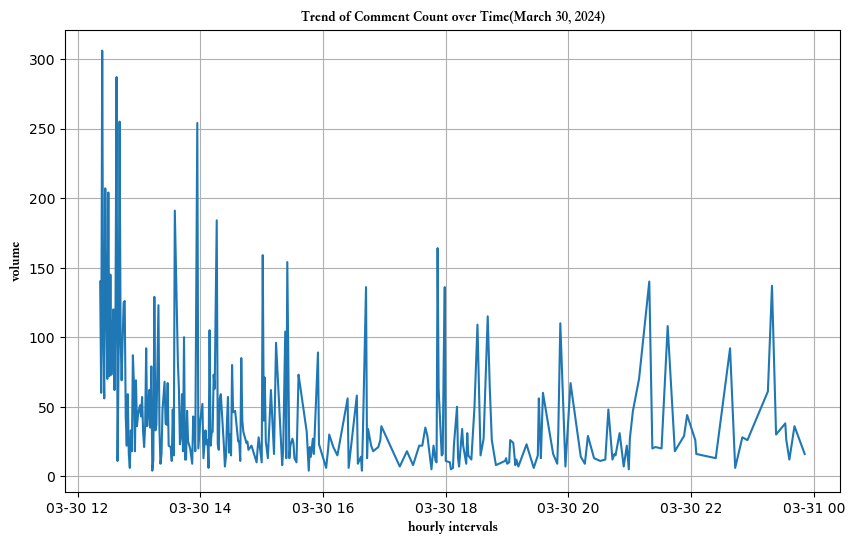

In [26]:
# 筛选出3月30号的数据
data_march_30th = df[(df['date'] >= '2024-03-30') & (df['date'] < '2024-03-31')]

# 按秒对评论数进行汇总
data_march_30th = data_march_30th.groupby(data_march_30th['date']).sum()

# 绘制趋势图
plt.figure(figsize=(10, 6))
plt.plot(data_march_30th.index, data_march_30th['length'], linestyle='-')
plt.title('Trend of Comment Count over Time(March 30, 2024)', fontproperties=font_prop)
plt.xlabel('hourly intervals', fontproperties=font_prop)
plt.ylabel('volume', fontproperties=font_prop)
plt.grid(True)
plt.show()